In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [2]:
checkpoints = r'D:\8th Semester\Machine learning\ML Labs\lab13\\E1-cp-{epoch:04d}-loss{val_loss:.2f}.h5'

In [3]:
train_dir = r'D:\8th Semester\Machine learning\ML Labs\lab11\train'
validation_dir = r'D:\8th Semester\Machine learning\ML Labs\lab11\validation'
test_dir = r'D:\8th Semester\Machine learning\ML Labs\lab11\test'

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='sigmoid'))

C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,088,452 (49.93 MB)

 Trainable params: 13,088,452 (49.93 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [7]:
train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size=(256, 256),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
                                                        validation_dir,
                                                        target_size=(256, 256),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(256, 256), batch_size=32,class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(256, 256),batch_size=32,class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


In [9]:
EpochCheckpoint = ModelCheckpoint(checkpoints,
                             monitor="val_loss",
                             save_best_only=True, 
                             verbose=1)
callbacks = [EpochCheckpoint]

In [10]:
model_history = model.fit(train_generator,
                         validation_data =validation_generator,
                         steps_per_epoch=train_generator.n//train_generator.batch_size,
                         validation_steps = validation_generator.n//validation_generator.batch_size,
                         epochs = 5,
                         callbacks = callbacks)

C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.4210 - loss: 1.2451  
Epoch 1: val_loss improved from inf to 0.61552, saving model to D:\8th Semester\Machine learning\ML Labs\lab13\\E1-cp-0001-loss0.62.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 166s 3s/step - acc: 0.4234 - loss: 1.2412 - val_acc: 0.7455 - val_loss: 0.6155
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.7301 - loss: 0.6127  
Epoch 2: val_loss improved from 0.61552 to 0.47389, saving model to D:\8th Semester\Machine learning\ML Labs\lab13\\E1-cp-0002-loss0.47.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 163s 3s/step - acc: 0.7303 - loss: 0.6121 - val_acc: 0.7723 - val_loss: 0.4739
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.7818 - loss: 0.4709  
Epoch 3: val_loss improved from 0.47389 to 0.43621, saving model to D:\8th Semester\Machine learning\ML Labs\lab13\\E1-cp-0003-loss0.44.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - acc: 0.7818 - loss: 0.4708 - val_acc: 0.7589 - val_loss: 0.4362
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.8077 - loss: 0.3861  
Epoch 4: val_loss improved from 0.43621 to 0.38863, saving model to D:\8th Semester\Machine learning\ML Labs\lab13\\E1-cp-0004-loss0.39.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 160s 3s/step - acc: 0.8074 - loss: 0.3867 - val_acc: 0.8125 - val_loss: 0.3886
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.8212 - loss: 0.3702  
Epoch 5: val_loss improved from 0.38863 to 0.33556, saving model to D:\8th Semester\Machine learning\ML Labs\lab13\\E1-cp-0005-loss0.34.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 160s 3s/step - acc: 0.8213 - loss: 0.3701 - val_acc: 0.8527 - val_loss: 0.3356


In [11]:
model_history.history

{'acc': [0.5393750071525574,
  0.7425000071525574,
  0.7837499976158142,
  0.7956249713897705,
  0.8262500166893005],
 'loss': [1.045586109161377,
  0.5849396586418152,
  0.4661145508289337,
  0.41641417145729065,
  0.36576056480407715],
 'val_acc': [0.7455357313156128,
  0.7723214030265808,
  0.7589285969734192,
  0.8125,
  0.8526785969734192],
 'val_loss': [0.6155168414115906,
  0.47388890385627747,
  0.4362071454524994,
  0.3886275589466095,
  0.3355567455291748]}

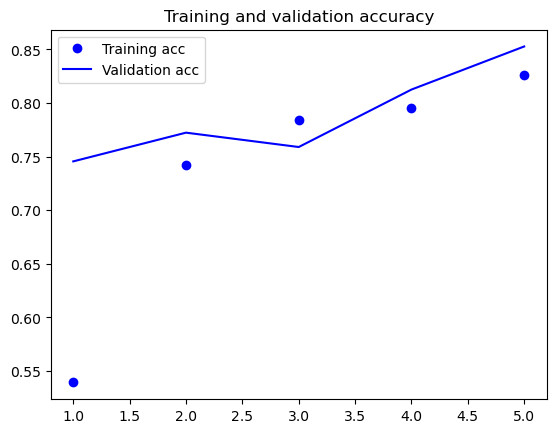

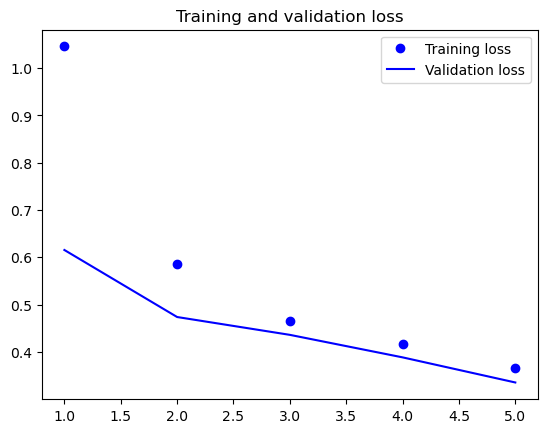

<Figure size 640x480 with 0 Axes>

In [12]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.savefig(r'D:\8th Semester\Machine learning\ML Labs\lab13\model_Accuracy.png')

Found 200 images belonging to 4 classes.
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 345ms/step


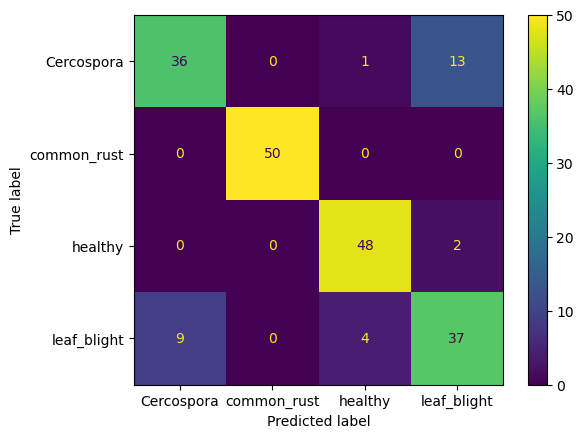

In [13]:
model = load_model(r'D:\8th Semester\Machine learning\ML Labs\lab13\E1-cp-0005-loss0.34.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(256, 256), batch_size=32, shuffle=False, class_mode='categorical')
label=test_generator.labels
preds=model.predict(test_generator)
pred = np.argmax(preds, axis = 1)
cm = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Cercospora', 'common_rust','healthy', 'leaf_blight'])
disp.plot()
plt.show()
#plt.savefig(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\confusion_matrics.jpg')

In [14]:
print(classification_report(label, pred, target_names=['Cercospora', 'common_rust','healthy', 'leaf_blight']))

              precision    recall  f1-score   support

  Cercospora       0.80      0.72      0.76        50
 common_rust       1.00      1.00      1.00        50
     healthy       0.91      0.96      0.93        50
 leaf_blight       0.71      0.74      0.73        50

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200

